In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from SAE import SparseAutoEncoder
from matplotlib import pyplot as plt


In [3]:
train_dataset = torch.load("BATADAL_train_dataset.pt")
val_dataset = torch.load("BATADAL_val_dataset.pt")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
input_dim = train_dataset.shape[1]
print(f"Number of features: {input_dim}")
dict_size = 1024

Number of features: 43


/tmp/ipykernel_689255/2041442180.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load("BATADAL_train_dataset.pt")
/tmp/ipykernel_689255/2041442180.

## Sparse Autoencoder

### Train

In [4]:
sae = SparseAutoEncoder(input_dim, dict_size)
optimizer = torch.optim.AdamW(sae.parameters(), lr=0.001)
num_epochs = 200

In [5]:
loss_history = sae.train_model(train_loader, val_loader, optimizer, num_epochs)

Epoch 0, Train Loss: 7.6578498006411335
Epoch 0, Valid Loss: 1.0697714946486734
Saved model with lowest valid loss: 1.0697714946486734 at epoch 0
Epoch 1, Train Loss: 1.9761125312003915
Epoch 1, Valid Loss: 0.5297116794369437
Saved model with lowest valid loss: 0.5297116794369437 at epoch 1
Epoch 2, Train Loss: 1.3751696402623774
Epoch 2, Valid Loss: 0.43481518084352666
Saved model with lowest valid loss: 0.43481518084352666 at epoch 2
Epoch 3, Train Loss: 1.1296566278422804
Epoch 3, Valid Loss: 0.3872191136533564
Saved model with lowest valid loss: 0.3872191136533564 at epoch 3
Epoch 4, Train Loss: 0.983133383265369
Epoch 4, Valid Loss: 0.3608554276553067
Saved model with lowest valid loss: 0.3608554276553067 at epoch 4
Epoch 5, Train Loss: 0.8940693172689986
Epoch 5, Valid Loss: 0.35091124881397595
Saved model with lowest valid loss: 0.35091124881397595 at epoch 5
Epoch 6, Train Loss: 0.8290955484185589
Epoch 6, Valid Loss: 0.32823154005137356
Saved model with lowest valid loss: 0.32

Text(0, 0.5, 'Loss')

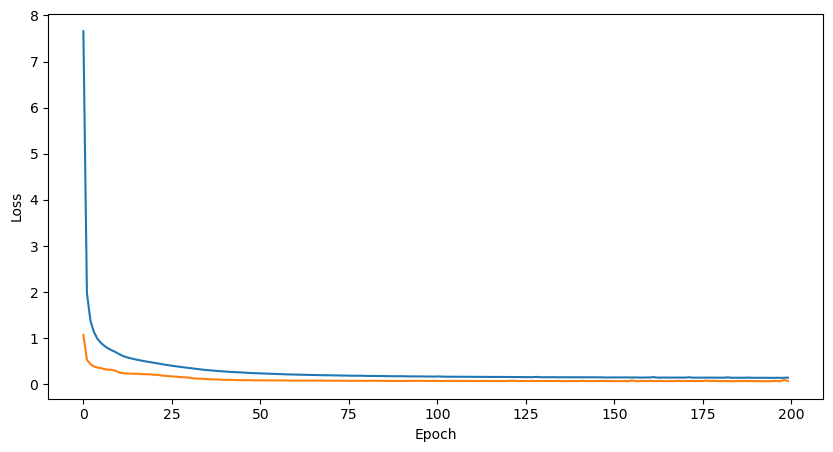

In [6]:
train_loss = loss_history['train']
valid_loss = loss_history['valid']
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Anomaly Detection